In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import tqdm as tqdm

In [ ]:
proj_path = "/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals"

# 전처리

# 70.npy 까보기

In [ ]:
data70 = np.load(f'{proj_path}/data/raw/70.npy')
print(data70)

[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 ...
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]]


In [ ]:
#BIS nan아닌 애들 indexing

bis70 = data70[:, 0]
bis70_cond = ~np.isnan(bis70)

In [ ]:
bis70_cond

array([False, False, False, ..., False, False, False])

In [ ]:
idx_arr = np.arange(0, len(bis70), 1)
bis70_idx = idx_arr[bis70_cond]

In [ ]:
bis70_idx.shape

(11086,)

In [ ]:
bis70_idx

array([    108,     208,     308, ..., 1110100, 1110200, 1110300])

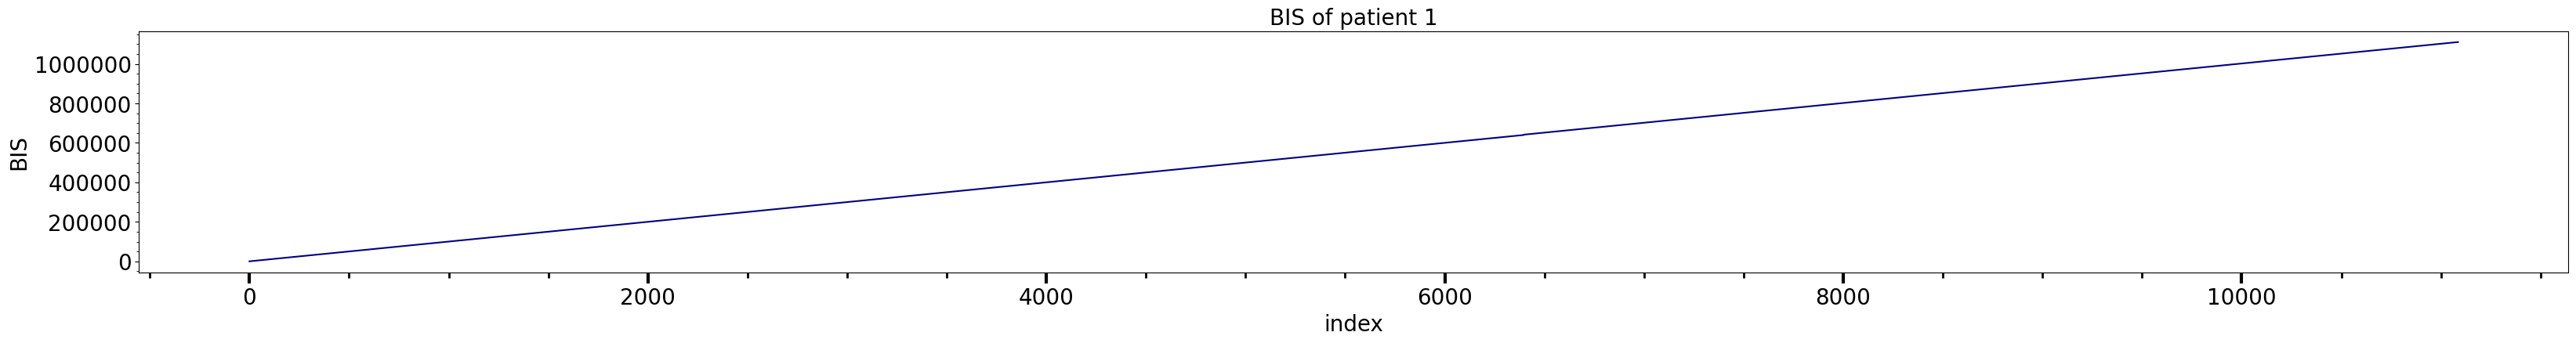

In [ ]:
x = np.linspace(0,11086, 11086)
b = bis70_idx
# plt.ticklabel_format(style='plain')

fig, ax = plt.subplots(figsize = (40,4))

plt.plot(x,b, color = 'navy')
plt.xlabel('index', fontsize =20)
plt.ylabel('BIS', fontsize = 20)
plt.title('BIS of patient 1', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.ticklabel_format(style='plain')

# ax.set_xticks(minor_xticks, minor=True)
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.xaxis.get_ticklocs(minor=True)

ax.tick_params(axis='x', labelsize=20, length=10, width=3)
ax.tick_params(axis='x', which='minor', length=5, width=2)
# plt.fill_between(x, b, color = 'navy')


In [ ]:
#data 0

In [ ]:
data0 = np.load(f'{proj_path}/data/raw/0.npy')

print(data0)

[[  nan   nan 16.  ]
 [  nan   nan 16.35]
 [  nan   nan 16.05]
 ...
 [  nan   nan   nan]
 [  nan   nan   nan]
 [  nan   nan   nan]]


In [ ]:
print('shape : ',data0.shape)
print('size : ', data0.size)

shape :  (1963291, 3)
size :  5889873


In [ ]:
np.isnan(data0)[np.isnan(data0) == False].size

2002348

In [ ]:
#BIS nan아닌 애들 indexing

bis = data0[:, 0]
bis_cond = ~np.isnan(bis)

In [ ]:
bis_cond

array([False, False, False, ..., False, False, False])

In [ ]:
idx_arr = np.arange(0, len(bis), 1)
bis_idx = idx_arr[bis_cond]

In [ ]:
bis_idx.shape

(19630,)

In [ ]:
bis_idx

array([     86,     186,     286, ..., 1962890, 1962990, 1963090])

In [ ]:
d = np.isnan(bis_idx)[np.isnan(bis_idx) == True].size
print('bis_label 결측치', d)

bis_label 결측치 0


In [ ]:
#EEG 30s씩 자르기

start = 55*100

eeg_start_idx = bis_idx - start
eeg_start_idx = eeg_start_idx[eeg_start_idx >= 0]

In [ ]:
eeg = data0[:, 2]
eeg

array([16.  , 16.35, 16.05, ...,   nan,   nan,   nan])

In [ ]:
eeg.shape

(1963291,)

In [ ]:
a = np.isnan(bis)[np.isnan(bis) == True].size
b = np.isnan(eeg)[np.isnan(eeg) == True].size

In [ ]:
print( "BIS nan 값 개수 : " , a)
print("EEG nan 값 개수 : " , b)

BIS nan 값 개수 :  1943661
EEG nan 값 개수 :  203


In [ ]:
eeg_start_idx.shape

(19575,)

In [ ]:
eeg_start_idx

array([     86,     186,     286, ..., 1957390, 1957490, 1957590])

In [ ]:
bis_idx.shape

(19630,)

In [ ]:
from tqdm import tqdm

In [ ]:
#0721 전처리

eeg_segments = []
bis_label = []
for start_idx in tqdm(eeg_start_idx):
  end_idx = start_idx + 30 * 100
  eeg_segments += list([eeg[start_idx:end_idx]])
  n = len(eeg_segments)
  bis_label = bis_idx[:n]

100%|██████████| 19575/19575 [00:00<00:00, 255791.68it/s]


In [ ]:
bis_label

array([     86,     186,     286, ..., 1957390, 1957490, 1957590])

In [ ]:
eeg_segments = np.array(eeg_segments)
bis_label = np.array(bis_label)

In [ ]:
eeg_segments

array([[16.3 , 15.85, 15.55, ..., 16.6 , 16.9 , 16.  ],
       [16.25, 16.3 , 16.  , ..., 15.9 , 15.9 , 15.75],
       [15.35, 15.95, 16.3 , ..., 16.05, 15.95, 16.25],
       ...,
       [16.3 , 16.45, 16.15, ..., 16.2 , 16.35, 16.3 ],
       [15.95, 16.1 , 16.1 , ..., 15.85, 16.  , 16.3 ],
       [16.1 , 16.75, 16.45, ..., 16.2 , 16.35, 16.05]])

In [ ]:
eeg_segements = np.reshape(eeg_segments, [-1,1,3000])

In [ ]:
eeg_segements.shape

(19575, 1, 3000)

In [ ]:
bis_label.shape

(19575,)

In [ ]:
a = np.isnan(bis_label)[np.isnan(bis_label) == True].size
a

0

# 이상치 관련

# eeg 결측치 채우기

In [ ]:
from scipy.stats import mode

In [ ]:
#eeg 결측치 채우기

c = np.isnan(eeg_segments)[np.isnan(eeg_segments) == True].size
print('eeg_segments 결측치', c)

eeg_segments 결측치 1890


In [ ]:
#eeg 결측치 채우기

A = eeg_segments

col_mean = np.nanmean(A, axis=1)
print(col_mean)
eeg_segments.shape, col_mean.shape

[16.063      16.06353333 16.06343333 ... 16.16613333 16.1623
 16.16226667]


((19575, 3000), (19575,))

In [ ]:

inds = np.where(np.isnan(A))
A[inds] = np.take(col_mean, inds[1])
print(A)
A.shape


[[16.3  15.85 15.55 ... 16.6  16.9  16.  ]
 [16.25 16.3  16.   ... 15.9  15.9  15.75]
 [15.35 15.95 16.3  ... 16.05 15.95 16.25]
 ...
 [16.3  16.45 16.15 ... 16.2  16.35 16.3 ]
 [15.95 16.1  16.1  ... 15.85 16.   16.3 ]
 [16.1  16.75 16.45 ... 16.2  16.35 16.05]]


(19575, 3000)

In [ ]:
mean = np.mean(A)

std = np.std(A)

print('데이터의 평균은', mean)

print('데이터의 표준 편차는', std)

데이터의 평균은 16.920158993348103
데이터의 표준 편차는 57.83618995961374


# 구간 별 max

In [ ]:
# #eeg max 값 뽑아내기
# # A로부터 출발 (19575, 3000)

# eeg_seg_abs = np.abs(A)

# map(max, eeg_seg_abs)
# eeg_max_list = list(map(max, eeg_seg_abs))

# eeg_max_list = np.array(eeg_max_list)
# eeg_max_list

In [ ]:
#eeg 구간 별 max list 뽑기

# eeg_seg_abs = np.abs(eeg_segments)

eeg_seg = eeg_segments
map(max, eeg_seg)
eeg_max_list = list(map(max, eeg_seg))

eeg_max_list = np.array(eeg_max_list)
eeg_max_list

# 최대값이 0보다 작은 애들
eeg_minus_cond = eeg_max_list < 0
eeg_max_list_minus = eeg_max_list[eeg_minus_cond]
eeg_max_list_minus

array([-23.2 , -33.95, -33.95, -33.95, -33.95, -26.1 , -15.95, -15.95,
       -15.95, -15.95, -11.9 , -11.9 , -11.9 , -11.9 , -11.9 , -11.9 ,
       -11.9 , -11.9 , -11.9 , -11.9 , -11.9 , -11.9 ,  -0.15,  -0.15,
        -0.15,  -0.15,  -0.15,  -0.15,  -0.15,  -0.15,  -0.15,  -0.15,
        -0.15,  -0.15,  -0.15,  -0.15,  -0.15,  -0.15,  -0.15])

In [ ]:
print('최대값 : ', np.max(eeg_max_list))
print('최소값 : ', np.min(eeg_max_list))

최대값 :  1800.05
최소값 :  -33.95


<ipython-input-48-d14f2cd3a776>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(eeg_max_list, shade = True)


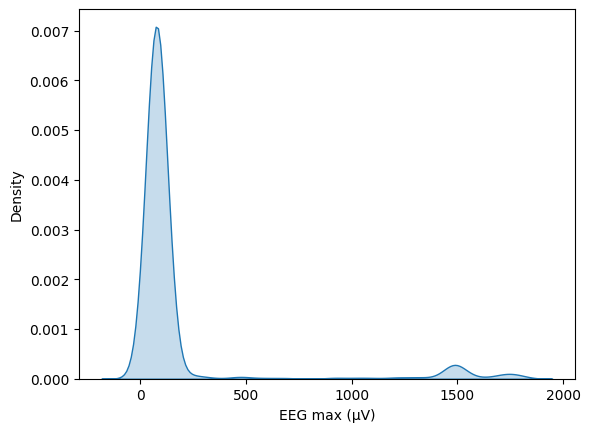

In [ ]:
# eeg max 분포 시각화

import seaborn as sns
sns.kdeplot(eeg_max_list, shade = True)
plt.xlabel('EEG max (µV)', fontsize=10)

plt.show()

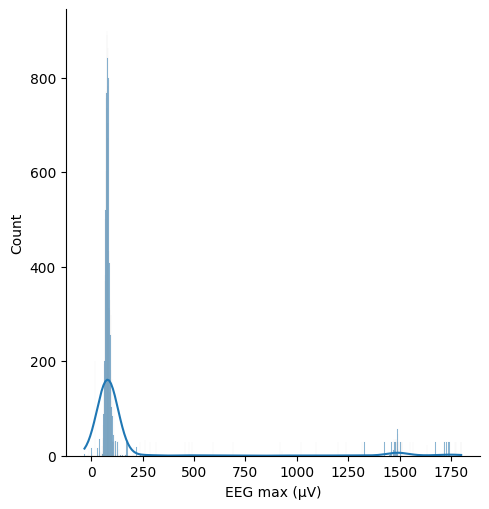

In [ ]:
sns.displot(eeg_max_list, kde=True)
plt.xlabel('EEG max (µV)', fontsize=10)

plt.show()

In [ ]:
map(max, EEG8)
eeg8_max_list = list(map(max, EEG8))

eeg8_max_list = np.array(eeg8_max_list)


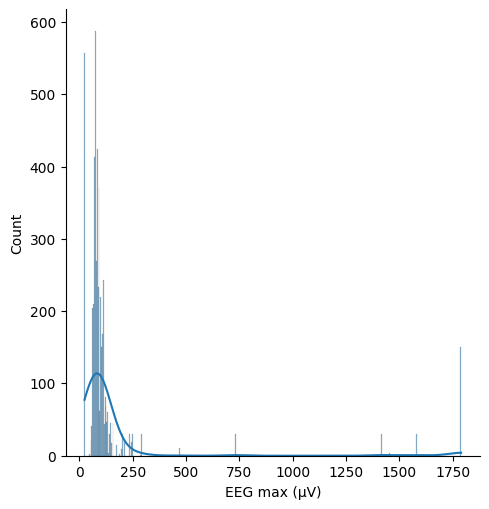

In [ ]:
sns.displot(eeg8_max_list, kde=True)
plt.xlabel('EEG max (µV)', fontsize=10)

plt.show()

In [ ]:
# eeg selection


# eeg_delcon2 = np.abs(eeg_max_list) < 500
# eeg_delcon2

# eeg_maxsel2 = eeg_seg[eeg_delcon2]
# eeg_maxsel2.shape

# 이상치 제거

In [ ]:
eeg_seg = eeg_segments

In [ ]:
# 절대값

eeg_max_abs = np.abs(eeg_max_list)
eeg_max_abs

# eeg_minus_cond = eeg_max_abs < 0
# eeg_max_list_minus = eeg_max_abs[eeg_minus_cond]
# eeg_max_list_minus

array([17.2 , 17.2 , 17.2 , ..., 17.25, 17.25, 17.25])

In [ ]:
#이상치 제거 사분위수

def outliers_iqr(data):
  q1, q3 = np.percentile(data, [25,75])
  iqr = q3 - q1
  lower_bound = q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)

  # return iqr, lower_bound, upper_bound
  # outlier = np.where((data > upper_bound)|(data < lower_bound))
  # return outlier

  return lower_bound, upper_bound

In [ ]:
# def outliers_1(data):
#   q1, q3 = np.percentile(data, [1,99])

#   return q1, q3
#   # outlier = np.where((data > upper_bound)|(data < lower_bound))
#   # return outlier

In [ ]:
outliers_iqr(eeg_max_abs)

(48.500000000000014, 110.89999999999999)

In [ ]:
# 절대값

eeg_max_abs = np.abs(eeg_max_list)
eeg_max_abs

In [ ]:
eeg_del_con=  eeg_max_abs < 100
eeg_del_con

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
eeg_maxsel = eeg_seg[eeg_del_con]
eeg_maxsel.shape

(17062, 3000)

In [ ]:
#tmaxsel에서 min을 또 제거하자

map(min, eeg_maxsel)
eeg_sel_min_list = list(map(min, eeg_maxsel))
eeg_sel_min_list = np.array(eeg_sel_min_list)
eeg_sel_min_list

array([14.95, 14.95, 14.95, ..., 15.2 , 15.2 , 15.2 ])

In [ ]:
eeg_sel_min_abs = np.abs(eeg_sel_min_list)
eeg_sel_min_abs

array([14.95, 14.95, 14.95, ..., 15.2 , 15.2 , 15.2 ])

In [ ]:
eeg_sel_del_con=  eeg_sel_min_abs < 100
eeg_sel_del_con

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
eeg_final = eeg_maxsel[eeg_sel_del_con]
eeg_final

array([[16.3 , 15.85, 15.55, ..., 16.6 , 16.9 , 16.  ],
       [16.25, 16.3 , 16.  , ..., 15.9 , 15.9 , 15.75],
       [15.35, 15.95, 16.3 , ..., 16.05, 15.95, 16.25],
       ...,
       [16.3 , 16.45, 16.15, ..., 16.2 , 16.35, 16.3 ],
       [15.95, 16.1 , 16.1 , ..., 15.85, 16.  , 16.3 ],
       [16.1 , 16.75, 16.45, ..., 16.2 , 16.35, 16.05]])

In [ ]:
eeg_final.shape

(16634, 3000)

In [ ]:
#연습

In [ ]:
test01 = np.array(([-10,-8,-6],[-4,-5,-6],[-4,0,2],[-6,0,6],[-10,1,2],[-8,1,6],[-4,1,5],[0,1,7],[4,1,9],[8,1,2],[10,1,2]))
test01

array([[-10,  -8,  -6],
       [ -4,  -5,  -6],
       [ -4,   0,   2],
       [ -6,   0,   6],
       [-10,   1,   2],
       [ -8,   1,   6],
       [ -4,   1,   5],
       [  0,   1,   7],
       [  4,   1,   9],
       [  8,   1,   2],
       [ 10,   1,   2]])

In [ ]:
map(max, test01)
test01_max_list = list(map(max, test01))
test01_max_list = np.array(test01_max_list)
test01_max_list

array([-6, -4,  2,  6,  2,  6,  5,  7,  9,  8, 10])

In [ ]:
test01_max_abs = np.abs(test01_max_list)
test01_max_abs

# eeg_minus_cond = eeg_max_abs < 0
# eeg_max_list_minus = eeg_max_abs[eeg_minus_cond]
# eeg_max_list_minus

array([ 6,  4,  2,  6,  2,  6,  5,  7,  9,  8, 10])

In [ ]:
test01_del_con=  test01_max_abs < 4
test01_del_con

array([False, False,  True, False,  True, False, False, False, False,
       False, False])

In [ ]:
test01_maxsel = test01[test01_del_con]
test01_maxsel

array([[ -4,   0,   2],
       [-10,   1,   2]])

In [ ]:
#test01_maxsel에서 min을 또 제거하자

map(min, test01_maxsel)
test01_sel_min_list = list(map(min, test01_maxsel))
test01_sel_min_list = np.array(test01_sel_min_list)
test01_sel_min_list

array([ -4, -10])

In [ ]:
test01_sel_min_abs = np.abs(test01_sel_min_list)
test01_sel_min_abs

array([ 4, 10])

In [ ]:
test01_sel_del_con=  test01_sel_min_abs < 5
test01_sel_del_con

array([ True, False])

In [ ]:
test01_final = test01_maxsel[test01_sel_del_con]
test01_final

array([[-4,  0,  2]])

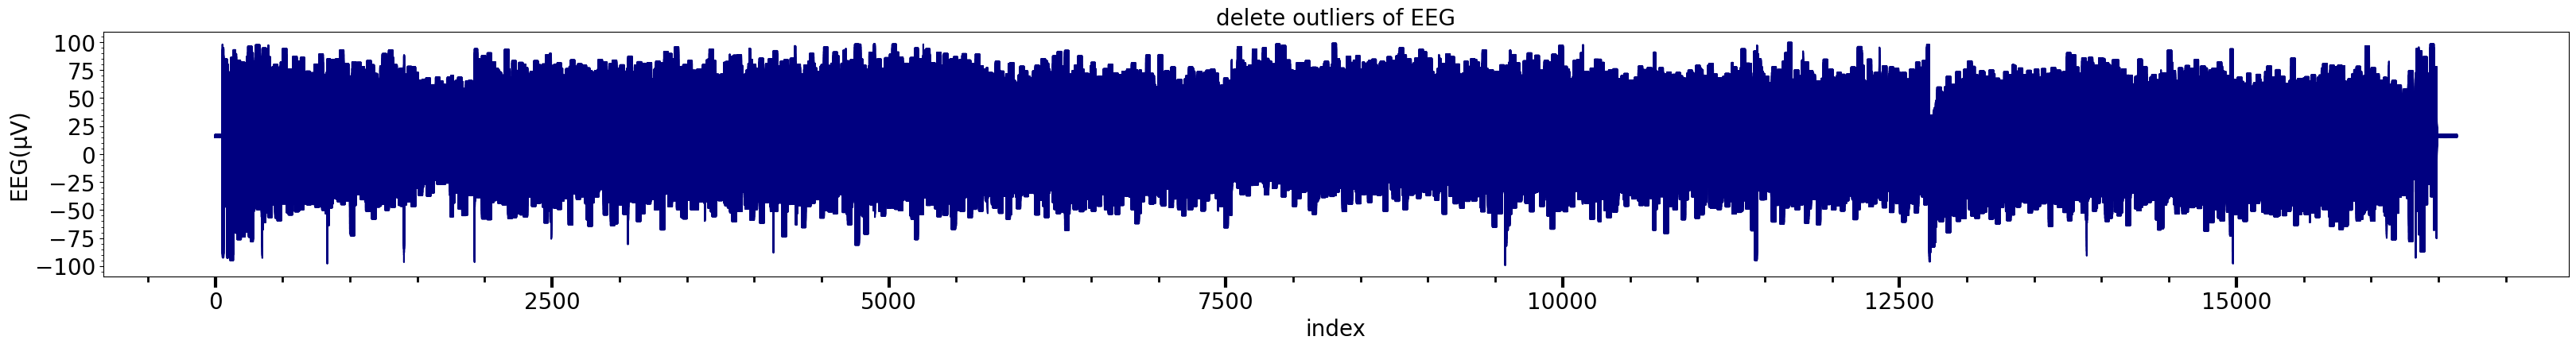

In [ ]:
#시각화

x = np.linspace(0,16634, 16634)
b = eeg_final
# plt.ticklabel_format(style='plain')

fig, ax = plt.subplots(figsize = (40,4))

plt.plot(x,b, color = 'navy')
plt.xlabel('index', fontsize =20)
plt.ylabel('EEG(μV)', fontsize = 20)
plt.title('delete outliers of EEG', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.ticklabel_format(style='plain')

# ax.set_xticks(minor_xticks, minor=True)
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.xaxis.get_ticklocs(minor=True)

ax.tick_params(axis='x', labelsize=20, length=10, width=3)
ax.tick_params(axis='x', which='minor', length=5, width=2)
# plt.fill_between(x, b, color = 'navy')


# max로 안 했던 거 접어두기

In [ ]:
# eeg_del_con_min =  -35.05 < A
# eeg_del_con_max =  A > 70.55

eeg_del_con2 =  ( -250 < A) & ( A < 250)
eeg_del_con2.shape
eeg_del_con2

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [ ]:
# false가 하나라도 있는 행 전체를 날려버리기

eeg_false_idx = np.array([np.all(i) for i in eeg_del_con2])
eeg_false_idx

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
eeg_selected = A[eeg_false_idx]

In [ ]:
eeg_selected.shape

(17695, 3000)

In [ ]:
bis_label.shape

(19575,)

In [ ]:
bis_selected = bis_label[eeg_false_idx]
bis_selected.shape

(17695,)

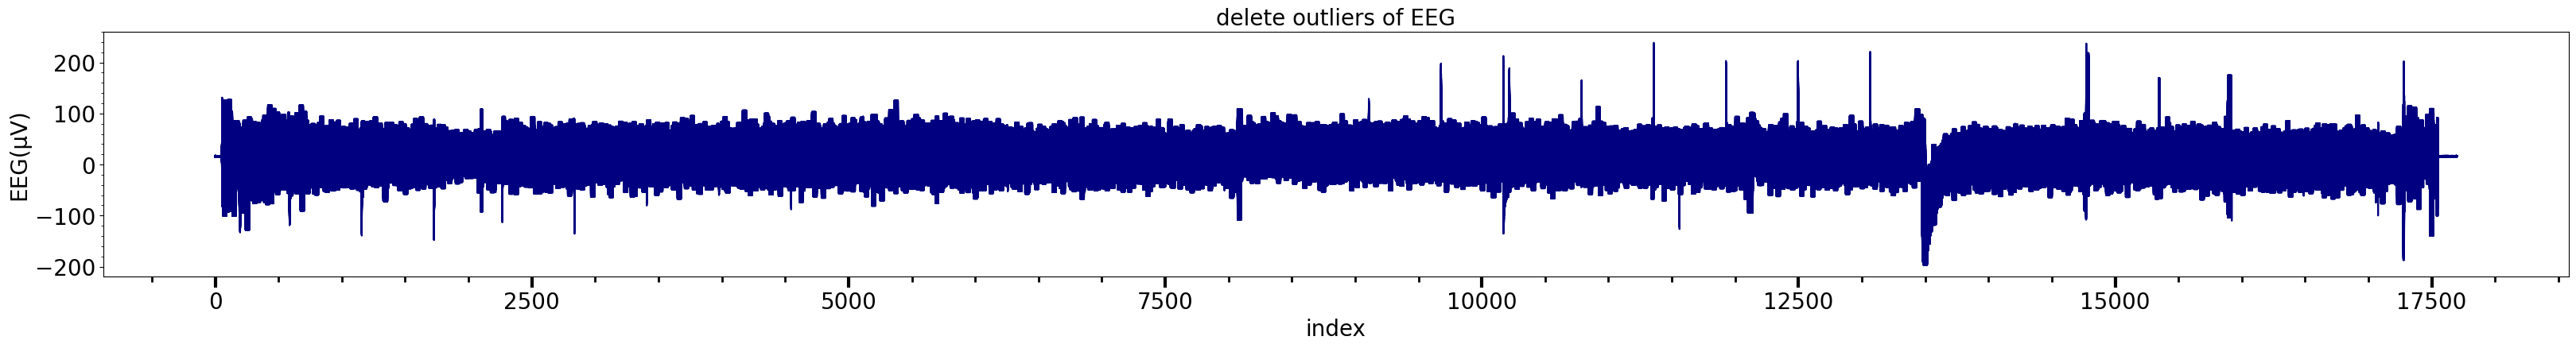

In [ ]:
#시각화

x = np.linspace(0,17695, 17695)
b = eeg_selected
# plt.ticklabel_format(style='plain')

fig, ax = plt.subplots(figsize = (40,4))

plt.plot(x,b, color = 'navy')
plt.xlabel('index', fontsize =20)
plt.ylabel('EEG(μV)', fontsize = 20)
plt.title('delete outliers of EEG', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.ticklabel_format(style='plain')

# ax.set_xticks(minor_xticks, minor=True)
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.xaxis.get_ticklocs(minor=True)

ax.tick_params(axis='x', labelsize=20, length=10, width=3)
ax.tick_params(axis='x', which='minor', length=5, width=2)
# plt.fill_between(x, b, color = 'navy')


#전처리 자동화


In [ ]:
import os
import tensorflow as tf


path = f'{proj_path}/data/raw'
file_list = os.listdir(path)
print(file_list)

for file in file_list:
    filepath = path + '/' + file
    print(filepath)

In [ ]:
#전처리 과정 담은 함수
from tqdm import tqdm

def preprocessing(filepath):
  # 전처리 과정 다 넣어두기
  # return: 전처리 된 결과물을 파일로 return (control에서 하기)

  data = np.load(filepath)

  bis=data[:,0]
  bis_cond = ~np.isnan(bis)
  idx_arr = np.arange(0, len(bis), 1)
  bis_idx = idx_arr[bis_cond]
  bis_no_nan = bis[bis_idx]

  eeg = data[:, 2]
  start = 55*100
  eeg_start_idx = bis_idx - start
  eeg_start_idx = eeg_start_idx[eeg_start_idx >= 0]

  sqi = data[:,1]
  sqi_cond = ~np.isnan(sqi)
  idx_arr_s = np.arange(0, len(sqi), 1)
  sqi_idx = idx_arr_s[sqi_cond]
  sqi_no_nan = sqi[sqi_idx]

  eeg_segments = []
  bis_label = []
  sqi_label = []

  for start_idx in tqdm(eeg_start_idx):
    end_idx = start_idx + 30 * 100
    eeg_segments += list([eeg[start_idx:end_idx]])
    n = len(eeg_segments)
    bis_label = bis_no_nan[:n]
    sqi_label = sqi_no_nan[:n]

  eeg_segments = np.array(eeg_segments)
  bis_label = np.array(bis_label)
  sqi_label = np.array(sqi_label)

  # sqi도 사용
  sqi_cond2 = sqi_label > 90

  bis_label = bis_label[sqi_cond2]
  sqi_label = sqi_label[sqi_cond2]
  eeg_segments = eeg_segments[sqi_cond2]

  #eeg nan 채우기
  A = eeg_segments
  col_mean = np.nanmean(A, axis=1)
  inds = np.where(np.isnan(A))
  A[inds] = np.take(col_mean, inds[1])

  #eeg selection
  #eeg 구간 별 max list 뽑기
  eeg_seg = eeg_segments
  map(max, eeg_seg)
  eeg_max_list = list(map(max, eeg_seg))

  eeg_max_list = np.array(eeg_max_list)

  # 절대값
  eeg_max_abs = np.abs(eeg_max_list)

  # 제거
  eeg_del_con=  eeg_max_abs < 100
  eeg_maxsel = eeg_seg[eeg_del_con]
  bis_label = bis_label[eeg_del_con]

  #eeg 구간 별 min
  map(min, eeg_maxsel)
  eeg_sel_min_list = list(map(min, eeg_maxsel))
  eeg_sel_min_list = np.array(eeg_sel_min_list)

  eeg_sel_min_abs = np.abs(eeg_sel_min_list)
  eeg_sel_del_con=  eeg_sel_min_abs < 100

  eeg_final = eeg_maxsel[eeg_sel_del_con]
  bis_label = bis_label[eeg_sel_del_con]

  # eeg < 0 mean으로 채우기
  column_means = np.mean(eeg_final[eeg_final > 0], axis=0)
  eeg_final[eeg_final <= 0] = column_means


  # eeg_selected = np.reshape(eeg_selected, [-1,1,3000])
  # bis_selected = np.reshape(bis_selected, [-1,1])

  inputs = eeg_final
  outputs = bis_label

  return inputs, outputs
  # 튜플


# 새 섹션

In [ ]:
#전처리 총괄하는 함수

def control():

  path = f'{proj_path}/data/raw'
  input_path =  f'{proj_path}/data/preprocessed_1/inputs'
  output_path = f'{proj_path}/data/preprocessed_1/outputs'
  file_list = os.listdir(path)
  print(file_list)

  for file in file_list:
    filepath = path + '/' + file
    print(filepath)
    preprocessing(filepath)
    # preprocessed = preprocessing(filepath)

    inputs, outputs = preprocessing(filepath)

    np.save(input_path + "/" + file + "_input.npy", inputs)
    np.save(output_path + "/" + file + "_output.npy", outputs)

In [ ]:
control()

['75.npy', '71.npy', '41.npy', '60.npy', '55.npy', '34.npy', '64.npy', '53.npy', '33.npy', '29.npy', '2.npy', '95.npy', '59.npy', '45.npy', '46.npy', '69.npy', '63.npy', '15.npy', '7.npy', '68.npy', '10.npy', '61.npy', '39.npy', '50.npy', '73.npy', '9.npy', '40.npy', '81.npy', '26.npy', '31.npy', '70.npy', '72.npy', '27.npy', '94.npy', '49.npy', '91.npy', '62.npy', '4.npy', '57.npy', '82.npy', '54.npy', '90.npy', '66.npy', '85.npy', '16.npy', '14.npy', '78.npy', '97.npy', '13.npy', '38.npy', '52.npy', '56.npy', '5.npy', '24.npy', '19.npy', '37.npy', '8.npy', '48.npy', '11.npy', '20.npy', '25.npy', '28.npy', '98.npy', '30.npy', '23.npy', '35.npy', '89.npy', '18.npy', '3.npy', '84.npy', '87.npy', '21.npy', '44.npy', '12.npy', '17.npy', '58.npy', '80.npy', '96.npy', '88.npy', '67.npy', '0.npy', '36.npy', '86.npy', '1.npy', '76.npy', '51.npy', '42.npy', '83.npy', '6.npy', '93.npy', '77.npy', '22.npy', '74.npy', '47.npy', '65.npy', '43.npy', '32.npy', '99.npy', '79.npy', '92.npy']
/content/

100%|██████████| 8566/8566 [00:00<00:00, 546231.97it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/71.npy


100%|██████████| 5211/5211 [00:00<00:00, 493921.45it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/41.npy


100%|██████████| 8129/8129 [00:00<00:00, 562093.99it/s]
<ipython-input-200-bb7a1566d5ee>:51: RuntimeWarning: Mean of empty slice
  col_mean = np.nanmean(A, axis=1)
100%|██████████| 8129/8129 [00:00<00:00, 530991.53it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/60.npy


100%|██████████| 6530/6530 [00:00<00:00, 538587.79it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/55.npy


100%|██████████| 8311/8311 [00:00<00:00, 556237.70it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/34.npy


100%|██████████| 17782/17782 [00:00<00:00, 609553.30it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/64.npy


100%|██████████| 9240/9240 [00:00<00:00, 276760.80it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/53.npy


100%|██████████| 4615/4615 [00:00<00:00, 513250.07it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/33.npy


100%|██████████| 19288/19288 [00:00<00:00, 608300.70it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/29.npy


100%|██████████| 5484/5484 [00:00<00:00, 498916.84it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/2.npy


100%|██████████| 7597/7597 [00:00<00:00, 580762.72it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/95.npy


100%|██████████| 19329/19329 [00:00<00:00, 639962.28it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/59.npy


100%|██████████| 3496/3496 [00:00<00:00, 543225.53it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/45.npy


100%|██████████| 6535/6535 [00:00<00:00, 601091.59it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/46.npy


100%|██████████| 4750/4750 [00:00<00:00, 317689.50it/s]


IndexError: ignored

In [ ]:
eeg8r =np.load('/content/drive/MyDrive/2023/preprocessed_10/inputs/8.npy_input.npy')
eeg8r.shape

(4548, 3000)

In [ ]:
b= np.load('/content/drive/MyDrive/2023/preprocessed_copy/train/outputs/5.npy_output.npy')
b.shape

(601,)

In [ ]:
eeg8 = np.load('/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/8.npy')
eeg8.shape

(511994, 3)

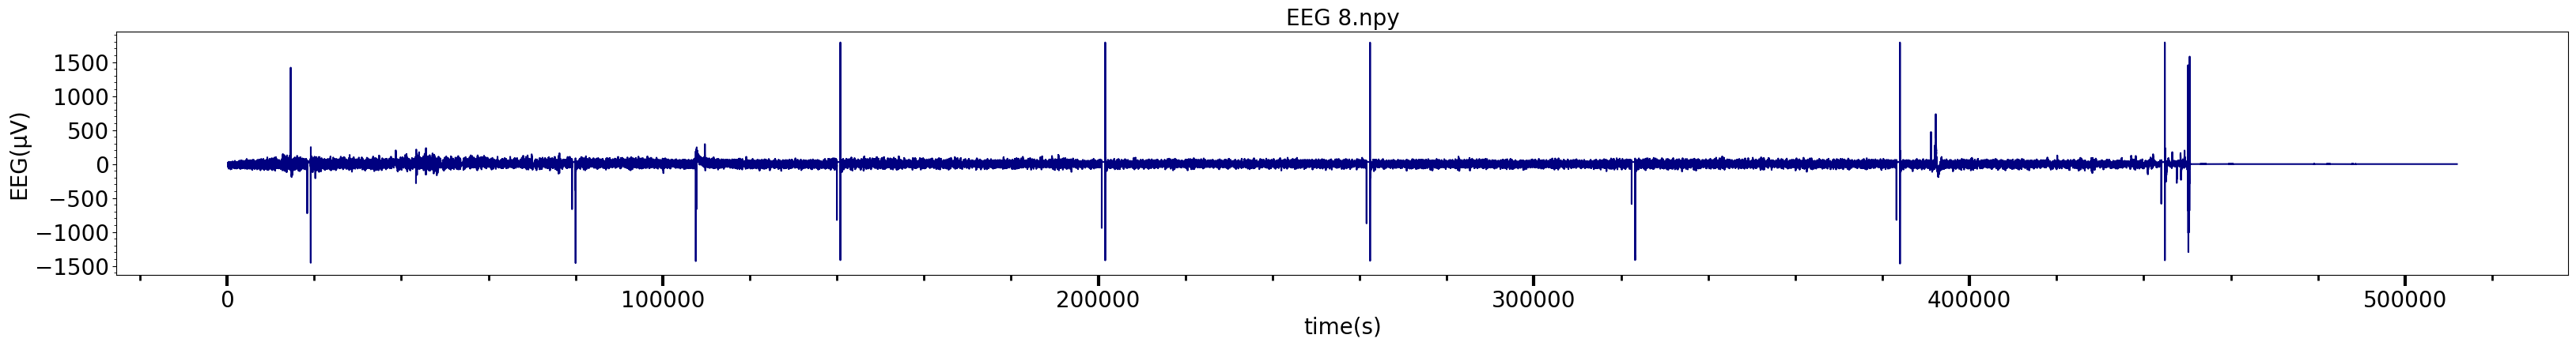

In [ ]:
x = np.linspace(0,511994, 511994)
b = eeg8
# plt.ticklabel_format(style='plain')

fig, ax = plt.subplots(figsize = (40,4))

plt.plot(x,b, color = 'navy')
plt.xlabel('time(s)', fontsize =20)
plt.ylabel('EEG(μV)', fontsize = 20)
plt.title('EEG 8.npy', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.ticklabel_format(style='plain')

# ax.set_xticks(minor_xticks, minor=True)
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.xaxis.get_ticklocs(minor=True)

ax.tick_params(axis='x', labelsize=20, length=10, width=3)
ax.tick_params(axis='x', which='minor', length=5, width=2)
# plt.fill_between(x, b, color = 'navy')


In [ ]:
from tqdm import tqdm

bis=eeg8[:,0]
bis_cond = ~np.isnan(bis)
idx_arr = np.arange(0, len(bis), 1)
bis_idx = idx_arr[bis_cond]

eeg = eeg8[:, 2]
start = 55*100
eeg_start_idx = bis_idx - start
eeg_start_idx = eeg_start_idx[eeg_start_idx >= 0]

eeg_segments = []
bis_label = []

for start_idx in tqdm(eeg_start_idx):
  end_idx = start_idx + 30 * 100
  eeg_segments += list([eeg[start_idx:end_idx]])
  n = len(eeg_segments)
  bis_label = bis_idx[:n]

eeg_segments = np.array(eeg_segments)
bis_label = np.array(bis_label)

#eeg nan 채우기
EEG8 = eeg_segments
col_mean = np.nanmean(EEG8, axis=1)
inds = np.where(np.isnan(EEG8))
EEG8[inds] = np.take(col_mean, inds[1])

100%|██████████| 5063/5063 [00:00<00:00, 505288.53it/s]


In [ ]:
eeg_segments.shape

(5063, 3000)

In [ ]:
# #0이하인 값은 다 평균값으로 채우기

# column_means = np.mean(EEG8[EEG8 > 0], axis=0)
# EEG8[EEG8 <= 0] = column_means

# EEG8

array([[24.47902326, 24.47902326, 24.47902326, ..., 24.47902326,
        24.47902326, 24.47902326],
       [24.47902326, 24.47902326, 24.47902326, ..., 23.2       ,
         1.3       , 24.47902326],
       [24.47902326,  0.75      , 24.47902326, ..., 24.47902326,
        18.95      , 28.05      ],
       ...,
       [24.47902326, 24.47902326, 24.47902326, ..., 24.47902326,
        24.47902326, 24.47902326],
       [24.47902326, 24.47902326, 24.47902326, ..., 24.47902326,
        24.47902326, 24.47902326],
       [24.47902326, 24.47902326, 24.47902326, ..., 24.47902326,
        24.47902326, 24.47902326]])

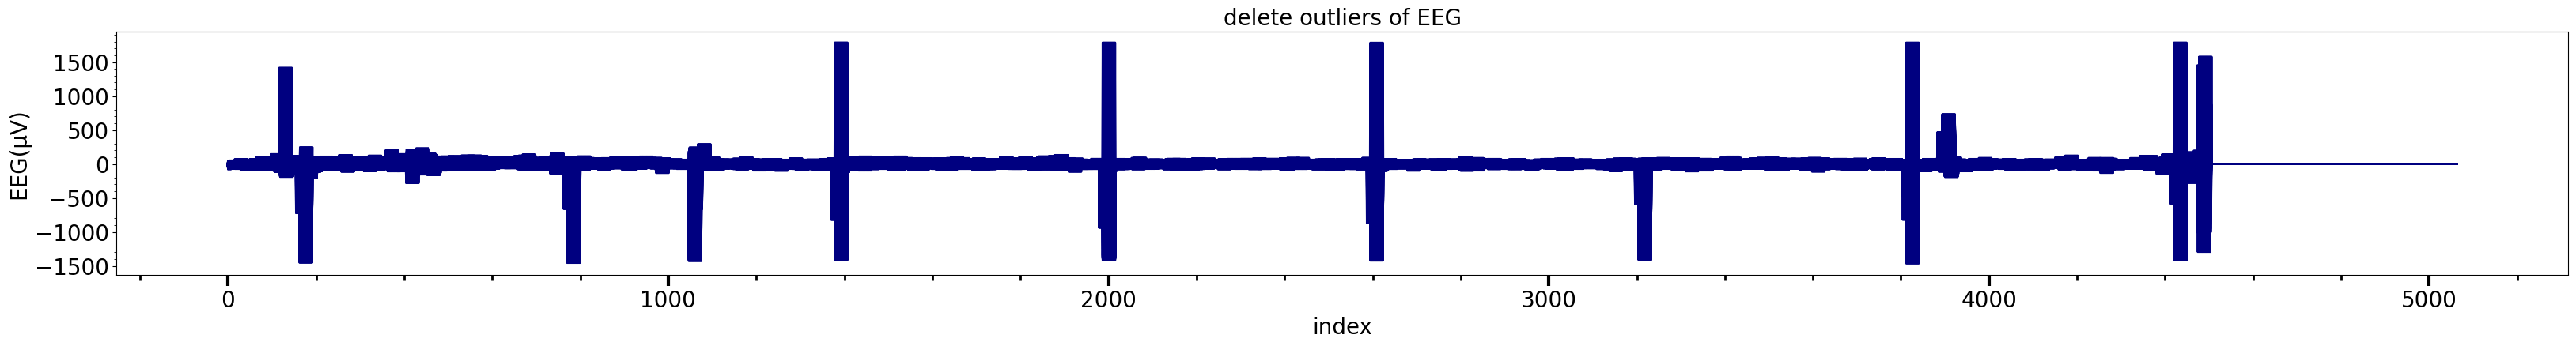

In [ ]:
x = np.linspace(0,5063, 5063)
b = EEG8
# plt.ticklabel_format(style='plain')

fig, ax = plt.subplots(figsize = (40,4))

plt.plot(x,b, color = 'navy')
plt.xlabel('index', fontsize =20)
plt.ylabel('EEG(μV)', fontsize = 20)
plt.title('delete outliers of EEG', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.ticklabel_format(style='plain')

# ax.set_xticks(minor_xticks, minor=True)
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.xaxis.get_ticklocs(minor=True)

ax.tick_params(axis='x', labelsize=20, length=10, width=3)
ax.tick_params(axis='x', which='minor', length=5, width=2)
# plt.fill_between(x, b, color = 'navy')


In [ ]:
t = np.array(([-1,-1,-1],[-2,-3,-4],[-3,0,2],[-4,0,9],[0,1,2],[0.5,1,2]))

In [ ]:
del_con =  EEG8 > 0
EEG8_false_idx = np.array([np.all(i) for i in del_con])

EEG8_selected = EEG8[EEG8_false_idx]
EEG8_selected.shape

(5063, 3000)

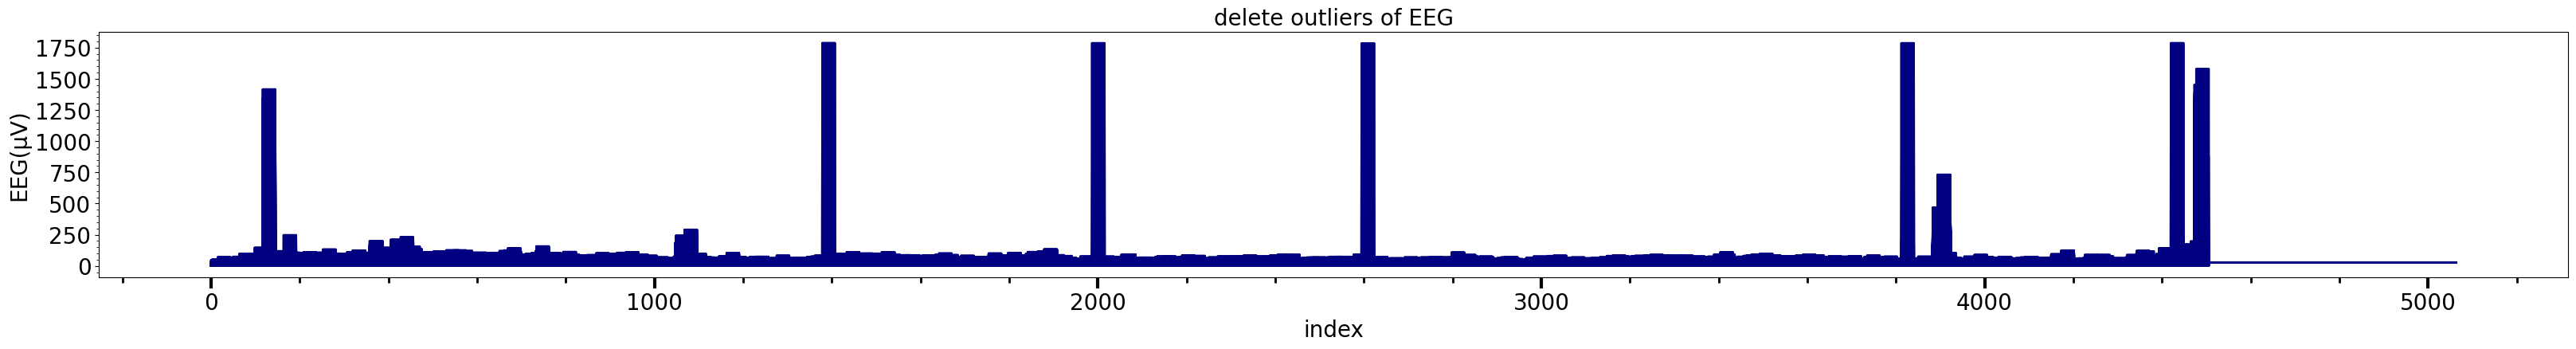

In [ ]:
x = np.linspace(0,5063, 5063)
b = EEG8
# plt.ticklabel_format(style='plain')

fig, ax = plt.subplots(figsize = (40,4))

plt.plot(x,b, color = 'navy')
plt.xlabel('index', fontsize =20)
plt.ylabel('EEG(μV)', fontsize = 20)
plt.title('delete outliers of EEG', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.ticklabel_format(style='plain')

# ax.set_xticks(minor_xticks, minor=True)
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.xaxis.get_ticklocs(minor=True)

ax.tick_params(axis='x', labelsize=20, length=10, width=3)
ax.tick_params(axis='x', which='minor', length=5, width=2)
# plt.fill_between(x, b, color = 'navy')


In [ ]:
map(max, EEG8)
eeg8_max_list = list(map(max, EEG8))

eeg8_max_list = np.array(eeg8_max_list)


In [ ]:
eeg8_del_con2=  eeg8_max_list < 100
eeg8_del_con2

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
eeg8_maxsel = EEG8[eeg8_del_con2]
eeg8_maxsel.shape

(3510, 3000)

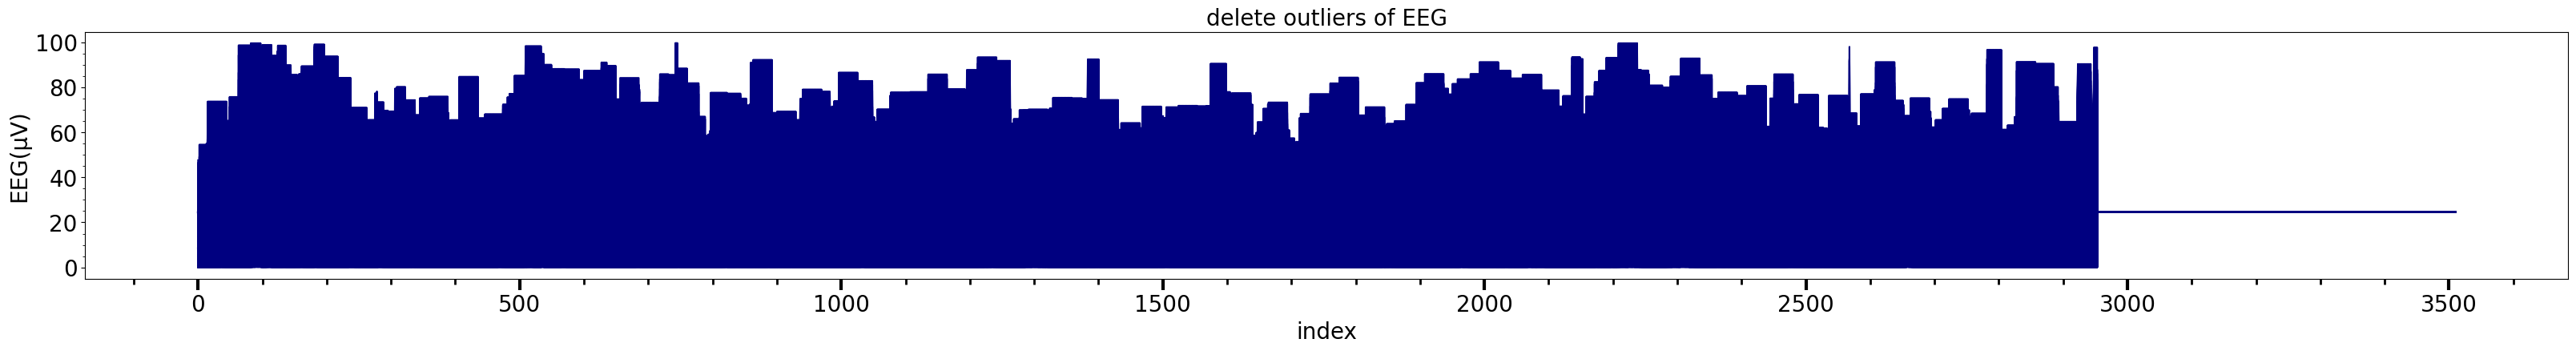

In [ ]:
x = np.linspace(0,3510, 3510)
b = eeg8_maxsel
# plt.ticklabel_format(style='plain')

fig, ax = plt.subplots(figsize = (40,4))

plt.plot(x,b, color = 'navy')
plt.xlabel('index', fontsize =20)
plt.ylabel('EEG(μV)', fontsize = 20)
plt.title('delete outliers of EEG', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.ticklabel_format(style='plain')

# ax.set_xticks(minor_xticks, minor=True)
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.xaxis.get_ticklocs(minor=True)

ax.tick_params(axis='x', labelsize=20, length=10, width=3)
ax.tick_params(axis='x', which='minor', length=5, width=2)
# plt.fill_between(x, b, color = 'navy')


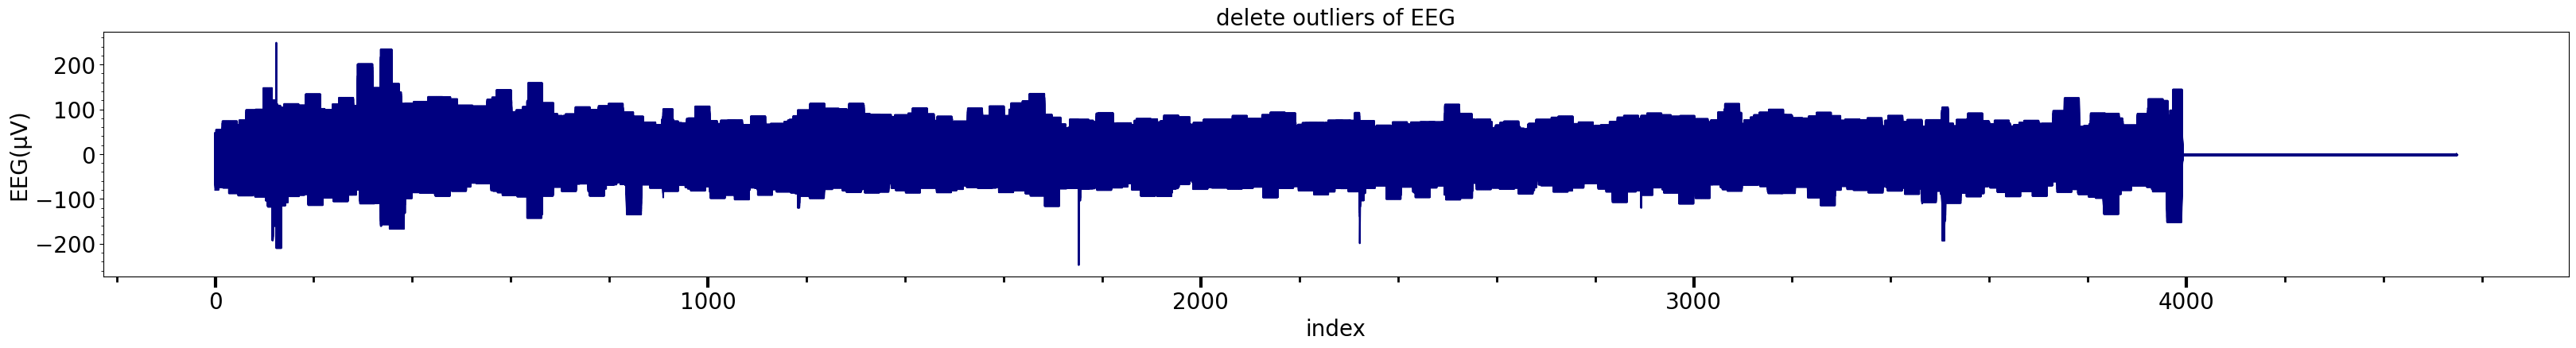

In [ ]:
x = np.linspace(0,4548, 4548)
b = eeg_selected
# plt.ticklabel_format(style='plain')

fig, ax = plt.subplots(figsize = (40,4))

plt.plot(x,b, color = 'navy')
plt.xlabel('index', fontsize =20)
plt.ylabel('EEG(μV)', fontsize = 20)
plt.title('delete outliers of EEG', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.ticklabel_format(style='plain')

# ax.set_xticks(minor_xticks, minor=True)
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.xaxis.get_ticklocs(minor=True)

ax.tick_params(axis='x', labelsize=20, length=10, width=3)
ax.tick_params(axis='x', which='minor', length=5, width=2)
# plt.fill_between(x, b, color = 'navy')


In [ ]:
eeg_del_con2 =  A > 0
eeg_false_idx = np.array([np.all(i) for i in eeg_del_con2])
eeg_false_idx

eeg_selected = A[eeg_false_idx]
eeg_selected


array([[16.3 , 15.85, 15.55, ..., 16.6 , 16.9 , 16.  ],
       [16.25, 16.3 , 16.  , ..., 15.9 , 15.9 , 15.75],
       [15.35, 15.95, 16.3 , ..., 16.05, 15.95, 16.25],
       ...,
       [16.3 , 16.45, 16.15, ..., 16.2 , 16.35, 16.3 ],
       [15.95, 16.1 , 16.1 , ..., 15.85, 16.  , 16.3 ],
       [16.1 , 16.75, 16.45, ..., 16.2 , 16.35, 16.05]])

In [ ]:
# arr = np.array([[0.8, 0.9], [0.1, 0.6], [0.2, 0.3]])

# arr_del_con = arr > 0.5
# arr_idx = np.array([np.all(i) for i in arr_del_con])
# arr_idx

# arr_select = arr[arr_idx]
# arr_select


array([[0.8, 0.9]])

# train / test / val 나누기

In [ ]:
!pip install split-folders
!pip install split-folders[full] # progress bar를 보고 싶을때

In [ ]:
data_path = "/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/preprocessed"

In [ ]:
import splitfolders

In [ ]:
import os
inputs_dir_path = f'{data_path}/inputs'
outputs_dir_path = f'{data_path}/outputs'

print('inputs 수:', len(os.listdir(inputs_dir_path)))
print('outputs 수:', len(os.listdir(outputs_dir_path)))

inputs 수: 100
outputs 수: 100


In [ ]:
os.mkdir("/content/drive/MyDrive/2023/preprocessed_split")

In [ ]:
splitfolders.ratio(f'{data_path}', output="/content/drive/MyDrive/2023/preprocessed_split", seed=43, ratio=(.6,.2,.2))

Copying files: 200 files [10:32,  3.16s/ files]
